In [319]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

from sklearn.model_selection import cross_validate

# encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import category_encoders as ce

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")  

# Goals 

- Predict the 

In [320]:
df_test = pd.read_csv('D:/Machine Learning Learn/mentalHealth/test.csv')

df_train = pd.read_csv('D:/Machine Learning Learn/mentalHealth/train.csv')

In [321]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Name                                   93800 non-null  object 
 2   Gender                                 93800 non-null  object 
 3   Age                                    93800 non-null  float64
 4   City                                   93800 non-null  object 
 5   Working Professional or Student        93800 non-null  object 
 6   Profession                             69168 non-null  object 
 7   Academic Pressure                      18767 non-null  float64
 8   Work Pressure                          75022 non-null  float64
 9   CGPA                                   18766 non-null  float64
 10  Study Satisfaction                     18767 non-null  float64
 11  Jo

In [322]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [323]:
pd.DataFrame({
    'column': df_train.columns.values,
    'datatype': df_train.dtypes.values,
    'nullvalue(%)': df_train.isna().mean().values * 100,
    'negativevalue(%)': [len(df_train[col][df_train[col] < 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    '0value(%)': [len(df_train[col][df_train[col] == 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    'duplicate' : df_train.duplicated().sum(),
    'uniquevalue': df_train.nunique().values,
    'sample_unique': [df_train[col].unique() for col in df_train.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.000,0.0,0.001,0,140700,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Name,object,0.000,0.0,0.000,0,422,"[Aaradhya, Vivan, Yuvraj, Rhea, Vani, Ritvik, ..."
2,Gender,object,0.000,0.0,0.000,0,2,"[Female, Male]"
3,Age,float64,0.000,0.0,0.000,0,43,"[49.0, 26.0, 33.0, 22.0, 30.0, 59.0, 47.0, 38...."
4,City,object,0.000,0.0,0.000,0,98,"[Ludhiana, Varanasi, Visakhapatnam, Mumbai, Ka..."
5,Working Professional or Student,object,0.000,0.0,0.000,0,2,"[Working Professional, Student]"
6,Profession,object,26.034,0.0,0.000,0,64,"[Chef, Teacher, nan, Business Analyst, Finanan..."
7,Academic Pressure,float64,80.173,0.0,0.000,0,5,"[nan, 5.0, 2.0, 3.0, 4.0, 1.0]"
8,Work Pressure,float64,19.842,0.0,0.000,0,5,"[5.0, 4.0, nan, 1.0, 2.0, 3.0]"
9,CGPA,float64,80.172,0.0,0.000,0,331,"[nan, 8.97, 5.9, 7.03, 5.59, 8.13, 5.7, 9.54, ..."


In [324]:
pd.DataFrame({
    'column': df_test.columns.values,
    'datatype': df_test.dtypes.values,
    'nullvalue(%)': df_test.isna().mean().values * 100,
    'negativevalue(%)': [len(df_test[col][df_test[col] < 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    '0value(%)': [len(df_test[col][df_test[col] == 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    'duplicate' : df_test.duplicated().sum(),
    'uniquevalue': df_test.nunique().values,
    'sample_unique': [df_test[col].unique() for col in df_test.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.000,0.0,0.00,0,93800,"[140700, 140701, 140702, 140703, 140704, 14070..."
1,Name,object,0.000,0.0,0.00,0,374,"[Shivam, Sanya, Yash, Nalini, Shaurya, Kartik,..."
2,Gender,object,0.000,0.0,0.00,0,2,"[Male, Female]"
3,Age,float64,0.000,0.0,0.00,0,44,"[53.0, 58.0, 23.0, 47.0, 29.0, 28.0, 21.0, 45...."
4,City,object,0.000,0.0,0.00,0,68,"[Visakhapatnam, Kolkata, Jaipur, Rajkot, Kalya..."
5,Working Professional or Student,object,0.000,0.0,0.00,0,2,"[Working Professional, Student]"
6,Profession,object,26.260,0.0,0.00,0,64,"[Judge, Educational Consultant, Teacher, nan, ..."
7,Academic Pressure,float64,79.993,0.0,0.00,0,5,"[nan, 5.0, 1.0, 3.0, 4.0, 2.0]"
8,Work Pressure,float64,20.019,0.0,0.00,0,5,"[2.0, 4.0, nan, 5.0, 1.0, 3.0]"
9,CGPA,float64,79.994,0.0,0.00,0,326,"[nan, 6.84, 7.39, 6.03, 8.63, 8.61, 6.73, 5.58..."


## Combine academic pressure with work pressure

In [325]:
df_test['Pressure'] = df_test['Academic Pressure'].combine_first(df_test['Work Pressure'])
df_train['Pressure'] = df_train['Academic Pressure'].combine_first(df_train['Work Pressure'])
df_test.drop(['Academic Pressure', 'Work Pressure'], axis=1, inplace=True)
df_train.drop(['Academic Pressure', 'Work Pressure'], axis=1, inplace=True)

In [326]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0


In [327]:
df_test['Satisfaction'] = df_test['Study Satisfaction'].combine_first(df_test['Job Satisfaction'])
df_train['Satisfaction'] = df_train['Study Satisfaction'].combine_first(df_train['Job Satisfaction'])
df_test.drop(['Study Satisfaction', 'Job Satisfaction'], axis=1, inplace=True)
df_train.drop(['Study Satisfaction', 'Job Satisfaction'], axis=1, inplace=True)

In [328]:
df_train.head()

,id,Name,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [329]:
df_test = df_test.drop(['Name'], axis=1)
df_train = df_train.drop(['Name'], axis=1)


In [330]:
df_train.head()

,id,Gender,Age,City,Working Professional or Student,Profession,CGPA,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Male,33.0,Visakhapatnam,Student,NaN,8.97,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [331]:
df_test = df_test.drop(['CGPA'], axis=1)
df_train = df_train.drop(['CGPA',], axis=1)

In [332]:
df_test.head()

,id,Gender,Age,City,Working Professional or Student,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Pressure,Satisfaction
0,140700,Male,53.0,Visakhapatnam,Working Professional,Judge,Less than 5 hours,Moderate,LLB,No,9.0,3.0,Yes,2.0,5.0
1,140701,Female,58.0,Kolkata,Working Professional,Educational Consultant,Less than 5 hours,Moderate,B.Ed,No,6.0,4.0,No,2.0,4.0
2,140702,Male,53.0,Jaipur,Working Professional,Teacher,7-8 hours,Moderate,B.Arch,Yes,12.0,4.0,No,4.0,1.0
3,140703,Female,23.0,Rajkot,Student,NaN,More than 8 hours,Moderate,BSc,Yes,10.0,4.0,No,5.0,1.0
4,140704,Male,47.0,Kalyan,Working Professional,Teacher,7-8 hours,Moderate,BCA,Yes,3.0,4.0,No,5.0,5.0


In [333]:
pd.DataFrame({
    'column': df_train.columns.values,
    'datatype': df_train.dtypes.values,
    'nullvalue(%)': df_train.isna().mean().values * 100,
    'negativevalue(%)': [len(df_train[col][df_train[col] < 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    '0value(%)': [len(df_train[col][df_train[col] == 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    'duplicate' : df_train.duplicated().sum(),
    'uniquevalue': df_train.nunique().values,
    'sample_unique': [df_train[col].unique() for col in df_train.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.000,0.0,0.001,0,140700,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Gender,object,0.000,0.0,0.000,0,2,"[Female, Male]"
2,Age,float64,0.000,0.0,0.000,0,43,"[49.0, 26.0, 33.0, 22.0, 30.0, 59.0, 47.0, 38...."
3,City,object,0.000,0.0,0.000,0,98,"[Ludhiana, Varanasi, Visakhapatnam, Mumbai, Ka..."
4,Working Professional or Student,object,0.000,0.0,0.000,0,2,"[Working Professional, Student]"
5,Profession,object,26.034,0.0,0.000,0,64,"[Chef, Teacher, nan, Business Analyst, Finanan..."
6,Sleep Duration,object,0.000,0.0,0.000,0,36,"[More than 8 hours, Less than 5 hours, 5-6 hou..."
7,Dietary Habits,object,0.003,0.0,0.000,0,23,"[Healthy, Unhealthy, Moderate, Yes, Pratham, B..."
8,Degree,object,0.001,0.0,0.000,0,115,"[BHM, LLB, B.Pharm, BBA, MCA, MD, BSc, ME, B.A..."
9,Have you ever had suicidal thoughts ?,object,0.000,0.0,0.000,0,2,"[No, Yes]"


In [334]:
df_train.loc[
    (df_train['Working Professional or Student'] == 'Student') & (df_train['Profession'].isnull()), 
    'Profession'
] = 'Student'

In [335]:
df_test.loc[
    (df_test['Working Professional or Student'] == 'Student') & (df_test['Profession'].isnull()), 
    'Profession'
] = 'Student'

In [336]:
pd.DataFrame({
    'column': df_train.columns.values,
    'datatype': df_train.dtypes.values,
    'nullvalue(%)': df_train.isna().mean().values * 100,
    'negativevalue(%)': [len(df_train[col][df_train[col] < 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    '0value(%)': [len(df_train[col][df_train[col] == 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    'duplicate' : df_train.duplicated().sum(),
    'uniquevalue': df_train.nunique().values,
    'sample_unique': [df_train[col].unique() for col in df_train.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.000,0.0,0.001,0,140700,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Gender,object,0.000,0.0,0.000,0,2,"[Female, Male]"
2,Age,float64,0.000,0.0,0.000,0,43,"[49.0, 26.0, 33.0, 22.0, 30.0, 59.0, 47.0, 38...."
3,City,object,0.000,0.0,0.000,0,98,"[Ludhiana, Varanasi, Visakhapatnam, Mumbai, Ka..."
4,Working Professional or Student,object,0.000,0.0,0.000,0,2,"[Working Professional, Student]"
5,Profession,object,6.228,0.0,0.000,0,64,"[Chef, Teacher, Student, Business Analyst, Fin..."
6,Sleep Duration,object,0.000,0.0,0.000,0,36,"[More than 8 hours, Less than 5 hours, 5-6 hou..."
7,Dietary Habits,object,0.003,0.0,0.000,0,23,"[Healthy, Unhealthy, Moderate, Yes, Pratham, B..."
8,Degree,object,0.001,0.0,0.000,0,115,"[BHM, LLB, B.Pharm, BBA, MCA, MD, BSc, ME, B.A..."
9,Have you ever had suicidal thoughts ?,object,0.000,0.0,0.000,0,2,"[No, Yes]"


In [337]:
pd.DataFrame({
    'column': df_test.columns.values,
    'datatype': df_test.dtypes.values,
    'nullvalue(%)': df_test.isna().mean().values * 100,
    'negativevalue(%)': [len(df_test[col][df_test[col] < 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    '0value(%)': [len(df_test[col][df_test[col] == 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    'duplicate' : df_test.duplicated().sum(),
    'uniquevalue': df_test.nunique().values,
    'sample_unique': [df_test[col].unique() for col in df_test.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.000,0.0,0.00,0,93800,"[140700, 140701, 140702, 140703, 140704, 14070..."
1,Gender,object,0.000,0.0,0.00,0,2,"[Male, Female]"
2,Age,float64,0.000,0.0,0.00,0,44,"[53.0, 58.0, 23.0, 47.0, 29.0, 28.0, 21.0, 45...."
3,City,object,0.000,0.0,0.00,0,68,"[Visakhapatnam, Kolkata, Jaipur, Rajkot, Kalya..."
4,Working Professional or Student,object,0.000,0.0,0.00,0,2,"[Working Professional, Student]"
5,Profession,object,6.275,0.0,0.00,0,64,"[Judge, Educational Consultant, Teacher, Stude..."
6,Sleep Duration,object,0.000,0.0,0.00,0,31,"[Less than 5 hours, 7-8 hours, More than 8 hou..."
7,Dietary Habits,object,0.005,0.0,0.00,0,22,"[Moderate, Healthy, Unhealthy, More Healthy, N..."
8,Degree,object,0.002,0.0,0.00,0,87,"[LLB, B.Ed, B.Arch, BSc, BCA, B.Com, MA, BA, B..."
9,Have you ever had suicidal thoughts ?,object,0.000,0.0,0.00,0,2,"[No, Yes]"


In [338]:
df_test = df_test.drop(['Working Professional or Student'], axis=1, errors='ignore')
df_train = df_train.drop(['Working Professional or Student'], axis=1, errors='ignore')


In [339]:
df_train = df_train.dropna(subset=['Profession', 'Dietary Habits', 'Degree', 'Pressure', 'Satisfaction','Financial Stress'])
#df_test = df_test.dropna(subset=['Profession', 'Dietary Habits', 'Degree', 'Pressure', 'Satisfaction'])


In [340]:
#df= df[df['ColName'] != 0]
df_train = df_train[df_train['Work/Study Hours'] != 0]
#df_test = df_test[df_test['Work/Study Hours'] != 0]


In [341]:
df_train.head()

,id,Gender,Age,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Pressure,Satisfaction
0,0,Female,49.0,Ludhiana,Chef,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0,5.0,2.0
1,1,Male,26.0,Varanasi,Teacher,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1,4.0,3.0
2,2,Male,33.0,Visakhapatnam,Student,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1,5.0,2.0
3,3,Male,22.0,Mumbai,Teacher,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1,5.0,1.0
4,4,Female,30.0,Kanpur,Business Analyst,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0,1.0,1.0


In [342]:
pd.DataFrame({
    'column': df_test.columns.values,
    'datatype': df_test.dtypes.values,
    'nullvalue(%)': df_test.isna().mean().values * 100,
    'negativevalue(%)': [len(df_test[col][df_test[col] < 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    '0value(%)': [len(df_test[col][df_test[col] == 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    'duplicate' : df_test.duplicated().sum(),
    'uniquevalue': df_test.nunique().values,
    'sample_unique': [df_test[col].unique() for col in df_test.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.000,0.0,0.00,0,93800,"[140700, 140701, 140702, 140703, 140704, 14070..."
1,Gender,object,0.000,0.0,0.00,0,2,"[Male, Female]"
2,Age,float64,0.000,0.0,0.00,0,44,"[53.0, 58.0, 23.0, 47.0, 29.0, 28.0, 21.0, 45...."
3,City,object,0.000,0.0,0.00,0,68,"[Visakhapatnam, Kolkata, Jaipur, Rajkot, Kalya..."
4,Profession,object,6.275,0.0,0.00,0,64,"[Judge, Educational Consultant, Teacher, Stude..."
5,Sleep Duration,object,0.000,0.0,0.00,0,31,"[Less than 5 hours, 7-8 hours, More than 8 hou..."
6,Dietary Habits,object,0.005,0.0,0.00,0,22,"[Moderate, Healthy, Unhealthy, More Healthy, N..."
7,Degree,object,0.002,0.0,0.00,0,87,"[LLB, B.Ed, B.Arch, BSc, BCA, B.Com, MA, BA, B..."
8,Have you ever had suicidal thoughts ?,object,0.000,0.0,0.00,0,2,"[No, Yes]"
9,Work/Study Hours,float64,0.000,0.0,8.67,0,13,"[9.0, 6.0, 12.0, 10.0, 3.0, 0.0, 8.0, 5.0, 4.0..."


In [343]:
pd.DataFrame({
    'column': df_train.columns.values,
    'datatype': df_train.dtypes.values,
    'nullvalue(%)': df_train.isna().mean().values * 100,
    'negativevalue(%)': [len(df_train[col][df_train[col] < 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    '0value(%)': [len(df_train[col][df_train[col] == 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    'duplicate' : df_train.duplicated().sum(),
    'uniquevalue': df_train.nunique().values,
    'sample_unique': [df_train[col].unique() for col in df_train.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.0,0.0,0.001,0,120589,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Gender,object,0.0,0.0,0.000,0,2,"[Female, Male]"
2,Age,float64,0.0,0.0,0.000,0,43,"[49.0, 26.0, 33.0, 22.0, 30.0, 59.0, 47.0, 38...."
3,City,object,0.0,0.0,0.000,0,92,"[Ludhiana, Varanasi, Visakhapatnam, Mumbai, Ka..."
4,Profession,object,0.0,0.0,0.000,0,61,"[Chef, Teacher, Student, Business Analyst, Fin..."
5,Sleep Duration,object,0.0,0.0,0.000,0,35,"[More than 8 hours, Less than 5 hours, 5-6 hou..."
6,Dietary Habits,object,0.0,0.0,0.000,0,21,"[Healthy, Unhealthy, Moderate, Yes, Pratham, B..."
7,Degree,object,0.0,0.0,0.000,0,107,"[BHM, LLB, B.Pharm, BBA, MCA, MD, BSc, ME, B.A..."
8,Have you ever had suicidal thoughts ?,object,0.0,0.0,0.000,0,2,"[No, Yes]"
9,Work/Study Hours,float64,0.0,0.0,0.000,0,12,"[1.0, 7.0, 3.0, 10.0, 9.0, 6.0, 8.0, 2.0, 5.0,..."


In [344]:
df_test['Dietary Habits'].unique()

array(['Moderate', 'Healthy', 'Unhealthy', 'More Healthy', 'No', 'Indoor',
       'Prachi', nan, 'Male', 'Less Healthy', 'Mealy', 'Resistant', 'MCA',
       '5 Healthy', 'Academic', 'Educational', 'Soham', '5 Unhealthy',
       'Vivaan', 'Raghav', '1.0', 'Naina', 'Kolkata'], dtype=object)

### Data Cleaning

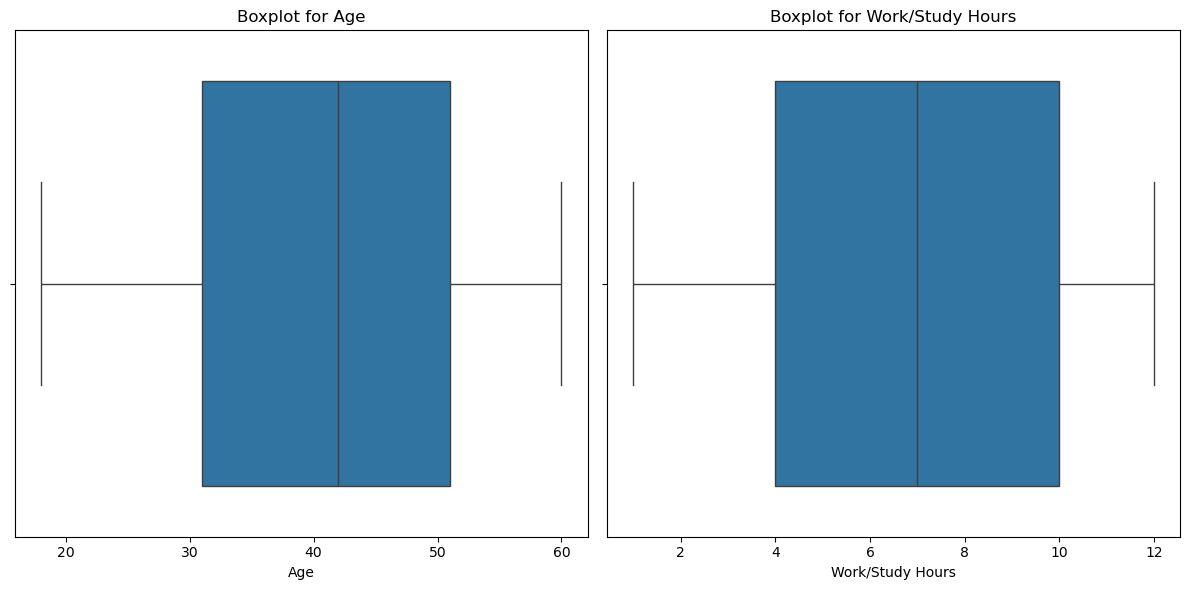

In [345]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_train['Age'])
plt.title('Boxplot for Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_train['Work/Study Hours'])
plt.title('Boxplot for Work/Study Hours')

plt.tight_layout()
plt.show()


In [346]:
valid_categories = {
    'Healthy': 'Healthy',
    'More Healthy': 'Healthy',
    'Less Healthy': 'Healthy',
    'Unhealthy': 'Unhealthy',
    'Less than Healthy': 'Unhealthy',
    'No Healthy': 'Unhealthy',
    'Moderate': 'Moderate'
}

df_train['Dietary Habits'] = df_train['Dietary Habits'].map(valid_categories).fillna(np.nan)

# Drop rows with invalid entries (optional)
df_train = df_train.dropna(subset=['Dietary Habits'])

In [347]:
df_test['Dietary Habits'] = df_test['Dietary Habits'].map(valid_categories).fillna(np.nan)

In [348]:
df_train['Dietary Habits'].unique()

array(['Healthy', 'Unhealthy', 'Moderate'], dtype=object)

In [349]:
df_train['Degree'].unique()

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'MBA', 'M.Com', 'MHM', 'BA', 'M.Tech',
       'PhD', 'MSc', 'Class 12', 'B.Tech', 'LLM', 'MBBS', 'M.Ed',
       'M.Pharm', 'B.Com', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', '20', 'Class 11', 'H_Pharm',
       'P.Com', 'BPharm', 'Business Analyst', 'LL.Com', 'M.Arch',
       'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan', 'Unite', 'BArch',
       'HR Manager', 'Badhya', 'S.Pharm', 'Vrinda', 'M. Business Analyst',
       'Bhavesh', '0', 'LLCom', '29', 'MTech', 'Vivaan', 'BPA', 'Plumber',
       '5.61', 'Brit', 'B.03', 'Degree', 'Ritik', 'M', 'MEd', 'B', 'B BA',
       '7.06', 'B.B.Arch', 'ACA', 'Brithika', 'CGPA', '24', 'Pihu', 'BB',
       'Jhanvi', 'LLTech', 'Aarav', 'LLBA', 'Entrepreneur', '8.56', 'LHM',
       'Lata', 'S.Arch', 'Marsh', 'HCA', 'B.Student', 'M.S', 'Mahika',
       'LL B.Ed', 'K.Ed', 'B.3.79', 'Mthanya', 'Working Professi

In [350]:
df_test['Degree'].unique()

array(['LLB', 'B.Ed', 'B.Arch', 'BSc', 'BCA', 'B.Com', 'MA', 'BA', 'BBA',
       'Class 12', 'MD', 'MBA', 'M.Ed', 'M.Pharm', 'BHM', 'LLM', 'PhD',
       'M.Com', 'BE', 'MBBS', 'B.Tech', 'ME', 'MCA', 'B.Pharm', 'MHM',
       'M.Tech', 'BTech', 'MSc', 'BArch', 'B. Gender', 'B.Study_Hours',
       'Advait', 'M.Arch', 'A.Ed', 'Mechanical Engineer', 'B.H', 'B.Sc',
       'B', 'M.UI', 'Vibha', 'B BCA', 'B.Press', 'BPharm', 'Gagan',
       'MPharm', 'Travel Consultant', '5.65', 'Business Analyst',
       'Eshita', 'B_Com', 'Navya', 'B._Pharm', 'Pune', 'Bian', 'B.M.Com',
       'Kavya', 'M.M.Ed', 'S.Pharm', 'Vrinda', 'M', 'E.Ed', '3.0',
       'Moham', 'B.BA', nan, 'I.Ed', 'Degree', 'Magan', 'B B.Tech',
       'M.B.Ed', 'Bhopal', 'B Financial Analyst', 'GCA', 'G.Ed', 'Rupak',
       'RCA', 'B.CA', 'PCA', 'J.Ed', 'BH', 'BEd', '8.95', 'Aadhya', '20',
       'Banchal', 'M.', 'K.Ed', 'BHCA'], dtype=object)

In [351]:
degree_mapping = {
    'BHM': 'BHM', 'LLB': 'B.LL', 'B.Pharm': 'B.Pharm', 'BBA': 'BBA',
    'MCA': 'MCA', 'MD': 'MD', 'BSc': 'B.Sc', 'ME': 'ME', 'B.Arch': 'B.Arch',
    'BCA': 'BCA', 'BE': 'BE', 'MA': 'MA', 'B.Ed': 'B.Ed', 'MBA': 'MBA',
    'M.Com': 'M.Com', 'MHM': 'MHM', 'BA': 'BA', 'M.Tech': 'M.Tech',
    'PhD': 'PhD', 'MSc': 'M.Sc', 'Class 12': 'Class 12', 'B.Tech': 'B.Tech',
    'LLM': 'LLM', 'MBBS': 'MBBS', 'M.Ed': 'M.Ed', 'M.Pharm': 'M.Pharm',
    'B.Com': 'B.Com', 'BPharm': 'B.Pharm', 'B.Sc': 'B.Sc', 'MPharm': 'M.Pharm',
    'B.Arch': 'B.Arch', 'M.Arch': 'M.Arch', 'MPA': 'MPA', 'BPA': 'BPA',
    'ACA': 'ACA', 'B.B.Arch': 'B.Arch', 'S.Arch': 'S.Arch', 'S.Tech': 'S.Tech',
    'LHM': 'LHM', 'E.Tech': 'E.Tech', 'N.Pharm': 'B.Pharm', 'LCA': 'B.LCA'
}

df_train['Degree'] = df_train['Degree'].map(degree_mapping).fillna(np.nan)
df_test['Degree'] = df_test['Degree'].map(degree_mapping).fillna(np.nan)

df_train = df_train.dropna(subset=['Degree'])

In [352]:
df_train['Sleep Duration'].unique()

array(['More than 8 hours', 'Less than 5 hours', '5-6 hours', '7-8 hours',
       'Sleep_Duration', '1-2 hours', '6-8 hours', '4-6 hours',
       '6-7 hours', '10-11 hours', '8-9 hours', '40-45 hours',
       '9-11 hours', '2-3 hours', '3-4 hours', 'Moderate', '55-66 hours',
       '4-5 hours', '9-6 hours', '1-3 hours', 'Indore', '45', '1-6 hours',
       '35-36 hours', '8 hours', 'No', '10-6 hours', 'than 5 hours',
       'Unhealthy', 'Work_Study_Hours', '3-6 hours', '45-48 hours', '9-5',
       'Pune', '9-5 hours'], dtype=object)

In [353]:
sleep_mapping = {
    'More than 8 hours': 'More than 8 hours',
    '5-6 hours': '5-6 hours',
    'Less than 5 hours': 'Less than 5 hours',
    '7-8 hours': '7-8 hours',
    '1-2 hours': '1-2 hours',
    '6-8 hours': '6-8 hours',
    '4-6 hours': '4-6 hours',
    '6-7 hours': '6-7 hours',
    '10-11 hours': '10-11 hours',
    '8-9 hours': '8-9 hours',
    '2-3 hours': '2-3 hours',
    '3-4 hours': '3-4 hours',
    '4-5 hours': '4-5 hours',
    '9-11 hours': '9-11 hours',
    '1-3 hours': '1-3 hours',
    '3-6 hours': '3-6 hours',
    'than 5 hours': 'Less than 5 hours',
    '9-6 hours': '6-9 hours',
    '9-5 hours': '5-9 hours',
    '9-5 hours': '5-9 hours',
    '10-6 hours': '6-10 hours'
}
df_train['Sleep Duration'] = df_train['Sleep Duration'].map(sleep_mapping).fillna(np.nan)
df_test['Sleep Duration'] = df_test['Sleep Duration'].map(sleep_mapping).fillna(np.nan)

df_train = df_train.dropna(subset=['Sleep Duration'])

In [354]:
pd.DataFrame({
    'column': df_train.columns.values,
    'datatype': df_train.dtypes.values,
    'nullvalue(%)': df_train.isna().mean().values * 100,
    'negativevalue(%)': [len(df_train[col][df_train[col] < 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    '0value(%)': [len(df_train[col][df_train[col] == 0]) / len(df_train) * 100 if col in df_train.select_dtypes(include=[np.number]).columns else 0 for col in df_train.columns],
    'duplicate' : df_train.duplicated().sum(),
    'uniquevalue': df_train.nunique().values,
    'sample_unique': [df_train[col].unique() for col in df_train.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.0,0.0,0.001,0,120471,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Gender,object,0.0,0.0,0.000,0,2,"[Female, Male]"
2,Age,float64,0.0,0.0,0.000,0,43,"[49.0, 26.0, 33.0, 22.0, 30.0, 59.0, 47.0, 38...."
3,City,object,0.0,0.0,0.000,0,91,"[Ludhiana, Varanasi, Visakhapatnam, Mumbai, Ka..."
4,Profession,object,0.0,0.0,0.000,0,61,"[Chef, Teacher, Student, Business Analyst, Fin..."
5,Sleep Duration,object,0.0,0.0,0.000,0,19,"[More than 8 hours, Less than 5 hours, 5-6 hou..."
6,Dietary Habits,object,0.0,0.0,0.000,0,3,"[Healthy, Unhealthy, Moderate]"
7,Degree,object,0.0,0.0,0.000,0,36,"[BHM, B.LL, B.Pharm, BBA, MCA, MD, B.Sc, ME, B..."
8,Have you ever had suicidal thoughts ?,object,0.0,0.0,0.000,0,2,"[No, Yes]"
9,Work/Study Hours,float64,0.0,0.0,0.000,0,12,"[1.0, 7.0, 3.0, 10.0, 9.0, 6.0, 8.0, 2.0, 5.0,..."


In [355]:
pd.DataFrame({
    'column': df_test.columns.values,
    'datatype': df_test.dtypes.values,
    'nullvalue(%)': df_test.isna().mean().values * 100,
    'negativevalue(%)': [len(df_test[col][df_test[col] < 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    '0value(%)': [len(df_test[col][df_test[col] == 0]) / len(df_test) * 100 if col in df_test.select_dtypes(include=[np.number]).columns else 0 for col in df_test.columns],
    'duplicate' : df_test.duplicated().sum(),
    'uniquevalue': df_test.nunique().values,
    'sample_unique': [df_test[col].unique() for col in df_test.columns]}
).round(3)

,column,datatype,nullvalue(%),negativevalue(%),0value(%),duplicate,uniquevalue,sample_unique
0,id,int64,0.000,0.0,0.00,0,93800,"[140700, 140701, 140702, 140703, 140704, 14070..."
1,Gender,object,0.000,0.0,0.00,0,2,"[Male, Female]"
2,Age,float64,0.000,0.0,0.00,0,44,"[53.0, 58.0, 23.0, 47.0, 29.0, 28.0, 21.0, 45...."
3,City,object,0.000,0.0,0.00,0,68,"[Visakhapatnam, Kolkata, Jaipur, Rajkot, Kalya..."
4,Profession,object,6.275,0.0,0.00,0,64,"[Judge, Educational Consultant, Teacher, Stude..."
5,Sleep Duration,object,0.017,0.0,0.00,0,17,"[Less than 5 hours, 7-8 hours, More than 8 hou..."
6,Dietary Habits,object,0.029,0.0,0.00,0,3,"[Moderate, Healthy, Unhealthy, nan]"
7,Degree,object,0.072,0.0,0.00,0,28,"[B.LL, B.Ed, B.Arch, B.Sc, BCA, B.Com, MA, BA,..."
8,Have you ever had suicidal thoughts ?,object,0.000,0.0,0.00,0,2,"[No, Yes]"
9,Work/Study Hours,float64,0.000,0.0,8.67,0,13,"[9.0, 6.0, 12.0, 10.0, 3.0, 0.0, 8.0, 5.0, 4.0..."


In [356]:
df_train['City'].unique()

array(['Ludhiana', 'Varanasi', 'Visakhapatnam', 'Mumbai', 'Kanpur',
       'Ahmedabad', 'Thane', 'Nashik', 'Bangalore', 'Patna', 'Rajkot',
       'Jaipur', 'Pune', 'Lucknow', 'Agra', 'Surat', 'Faridabad',
       'Meerut', 'Hyderabad', 'Srinagar', 'Ghaziabad', 'Kolkata',
       'Chennai', 'Kalyan', 'Nagpur', 'Vasai-Virar', 'Vadodara', 'Delhi',
       'Bhopal', 'Indore', 'Ishanabad', 'Vidhi', 'Ayush', 'Gurgaon',
       'Krishna', 'Aishwarya', 'Keshav', 'Harsha', 'Nalini', 'Aditya',
       'Malyansh', 'Raghavendra', 'Saanvi', 'M.Tech', 'Less Delhi',
       'Nandini', 'M.Com', 'Plata', 'Atharv', 'Pratyush', 'City', '3.0',
       'Less than 5 Kalyan', 'MCA', 'Mira', 'Moreadhyay', 'Morena',
       'Ishkarsh', 'Kashk', 'Mihir', 'Anvi', 'Ayansh', 'Shrey', 'Ivaan',
       'Vaanya', 'Gaurav', 'Bhavna', 'Harsh', 'Reyansh', 'Kibara',
       'Vaishnavi', 'Parth', 'Mahi', 'Tushar', 'Vidya', 'MSc', 'No',
       'Rashi', 'ME', 'Molkata', 'Researcher', 'Armaan', 'Ithal',
       'Nalyan', 'Galesabad', '

In [357]:

valid_cities = [
    'Ludhiana', 'Visakhapatnam', 'Mumbai', 'Kanpur', 'Ahmedabad', 'Thane', 
    'Nashik', 'Bangalore', 'Patna', 'Rajkot', 'Jaipur', 'Pune', 'Lucknow', 
    'Agra', 'Surat', 'Faridabad', 'Meerut', 'Hyderabad', 'Srinagar', 
    'Ghaziabad', 'Kolkata', 'Varanasi', 'Kalyan', 'Nagpur', 'Chennai', 
    'Vasai-Virar', 'Vadodara', 'Delhi', 'Bhopal', 'Indore', 'Gurgaon'
]


def clean_city(city):
    city = str(city).strip().title()  # Standardize format
    city = city.replace('Less Than', '').replace('Less', '').replace('More Than', '').strip()
    corrections = {
        'Molkata': 'Kolkata',
        'Khaziabad': 'Ghaziabad',
        'Nalyan': 'Kalyan',
        'Less Delhi': 'Delhi'
    }
    city = corrections.get(city, city) 
    return city if city in valid_cities else np.nan 

df_train['City'] = df_train['City'].apply(clean_city)

# Drop rows with invalid city names
df_train = df_train.dropna(subset=['City'])


In [358]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120392 entries, 0 to 140699
Data columns (total 15 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     120392 non-null  int64  
 1   Gender                                 120392 non-null  object 
 2   Age                                    120392 non-null  float64
 3   City                                   120392 non-null  object 
 4   Profession                             120392 non-null  object 
 5   Sleep Duration                         120392 non-null  object 
 6   Dietary Habits                         120392 non-null  object 
 7   Degree                                 120392 non-null  object 
 8   Have you ever had suicidal thoughts ?  120392 non-null  object 
 9   Work/Study Hours                       120392 non-null  float64
 10  Financial Stress                       120392 non-null  float

In [359]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93800 entries, 0 to 93799
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     93800 non-null  int64  
 1   Gender                                 93800 non-null  object 
 2   Age                                    93800 non-null  float64
 3   City                                   93800 non-null  object 
 4   Profession                             87914 non-null  object 
 5   Sleep Duration                         93784 non-null  object 
 6   Dietary Habits                         93773 non-null  object 
 7   Degree                                 93732 non-null  object 
 8   Have you ever had suicidal thoughts ?  93800 non-null  object 
 9   Work/Study Hours                       93800 non-null  float64
 10  Financial Stress                       93800 non-null  float64
 11  Fa

In [361]:

columns_to_scale = ['Age', 'Work/Study Hours']

scaler = StandardScaler()

df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])

print(df_train[columns_to_scale].head())

        Age  Work/Study Hours
0  0.664063         -1.664139
1 -1.243933          0.049102
2 -0.663239         -1.093058
3 -1.575759          0.905723
4 -0.912108          0.620183
